# Assignment 2:  the perceptron


* **By Vignesh M. Pagadala**
* **Vignesh.Pagadala@colostate.edu**


## Datasets

In this assignment we will use the following datasets:
  * The [Gisette](http://archive.ics.uci.edu/ml/datasets/Gisette) handwritten digit recognition dataset. 
  * The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
  * The [Heart disease diagnosis](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset.
  * For developing your code, you can use one of the scikit-learn datasets, such as the [breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) and the [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) toy dataset generator.
  
When writing your notebook, you can assume the datasets are in the same directory as the notebook.  Please keep the same file names as in the UCI repository.
  

## Part 1:  Variants of the perceptron algorithm 

In this assignment you will work with several variants of the perceptron algorithm:

  * The "vanila" version of the perceptron algorithm, which was introduced in class.
  * The pocket algorithm as described in the slides or page 80 in the book.
  * The **adatron** version of the perceptron described next.

In each case make sure that your implementation of the classifier **includes a bias term** (in slide set 2 and page 7 in the book you will find guidance on how to add a bias term to an algorithm that is expressed without one).

## The adatron 

Before we get to the adatron, we will derive an alternative form of the perceptron algorithm --- the dual perceptron algorithm.  All we need to look at is the weight update rule:

$$\mathbf{w} \rightarrow \mathbf{w} + \eta y_i \mathbf{x}_i.$$

This is performed whenever example $i$ is misclassified by the current weight vector.  The thing to notice, is that the weight vector is always a weighted combination of the training examples since it is that way to begin with, and each update maintains that property.  So in fact, rather than representing $\mathbf{w}$ explicitly, all we need to do is to keep track of how much each training example is contributing to the value of the weight vector, i.e. we will express it as:

$$\mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i,$$

where $\alpha_i$ are positive numbers that describe the magnitude of the contribution $\mathbf{x}_i$ is making to the weight vector, and $N$ is the number of training examples.

Therefore to initialize $\mathbf{w}$ to 0, we simply initialize $\alpha_i = 0$ for $i = 1,\ldots,N$.  When expressed using the variables $\alpha_i$, the perceptron update rule becomes:

$$\alpha_i = \alpha_i + \eta y_i,$$

and you can always retrieve the weight vector using its expansion in terms of the $\alpha_i$.

Now we're ready for the adatron - the only difference is in the initialization and update equation.

Initialization:

$\alpha_i = 1$ for $i = 1,\ldots,N$

Like in the perceptron we run the algorithm until convergence, or until a fixed number of epochs has passed (an epoch is a loop over all the training data), and an epoch of training consists of the following procedure:

for each training example $i=1,\ldots,N$ perform the following steps:

1.  $\gamma = y_i * \mathbf{w}^{t} \mathbf{x}_i$
2.  $\delta\alpha = \eta * (1 - \gamma)$
3.  `if` $(\alpha_i + \delta\alpha < 0)$ : $\alpha_i = 0$, `else : ` $\alpha_i = \alpha_i + \delta\alpha$


The variable $\eta$ plays the role of the learning rate $\eta$ employed in the perceptron algorithm and $\delta \alpha$ is the proposed magnitude of change in $\alpha_i$. 
We note that the adatron tries to maintain a **sparse** representation in terms of the training examples by keeping many $\alpha_i$ equal to zero.  The adatron converges to a special case of the SVM algorithm that we will learn later in the semester; this algorithm tries to maximize the margin with which each example is classified, which is captured by the variable $\gamma$ in the algorithm (notice that the magnitude of change proposed for each $\alpha_i$ becomes smaller as $\gamma$ increases towards 1).

**Note:** if you observe an overflow issues in running the adatron, add an upper bound on the value of $\alpha_i$.

Here's what you need to do:

  - Implement the pocket algorithm and the adatron; each classifier should be implemented in a separate Python class, and use the same interface used in the code provided for the perceptron algorithm, i.e. provides the same methods with the same signature.  Make sure each classifier you use (including the original version of the perceptron) implements a bias term.
  - Compare the performance of these variants of the perceptron on the Gisette and QSAR datasets by computing an estimate of the out of sample error on a sample of the data that you reserve for testing (the test set).  In each case reserve about 60% of the data for training, and 40% for testing.  To gain more confidence in our error estimates, repeat this experiment using 10 random splits of the data into training/test sets.  Report the average error and its standard deviation in a nicely formatted table.  Is there a version of the perceptron that appears to perform better?   (In answering this, consider the differences in performance you observe in comparison to the standard deviation).



In [14]:
def generate_separable_data(N) :
    w = np.random.uniform(-1, 1, 2)
    print(w)
    X = np.random.uniform(-1, 1, [N, 2])
    print (X.shape)
    y = np.sign(np.inner(w, X))
    return X,y,w

# ANSWER: #

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
from astropy.table import Table, Column
import pandas as pd

## 1.a. Perceptron - Vanilla Version##

In [33]:
class Perceptron :
    def __init__(self, max_iterations=100, learning_rate=0.2, bias = 0) :
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.bias = bias
 
    def fit(self, X, y) :
        self.w = np.zeros(len(X[0]))
        # ADDING BIAS TERM
        # Change input to accomodate bias. Tack a column of 1s.
        X = np.insert(X, 0, 1, 1)
        # Include bias in weight
        self.w = np.insert(self.w, 0, self.bias)
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
            iterations += 1
        self.converged = converged
        if converged :
            #print ('converged in %d iterations ' % iterations)
            pass
        return self.w
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        scores = np.inner(self.w, X)
        return np.sign(scores)

## 1.b. Perceptron - Pocket Algorithm##

In [35]:
class Pocket :
    def __init__(self, max_iterations=100, learning_rate=0.2, bias = 0) :
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.bias = bias

    def fit(self, X, y) :
        self.w = np.zeros(len(X[0]))
        self.w_pocket = np.zeros(len(X[0]))
        # ADDING BIAS TERM
        # Change input to accomodate bias. Tack a column of 1s.
        X = np.insert(X, 0, 1, 1)
        # Include bias in weights
        self.w = np.insert(self.w, 0, self.bias)
        self.w_pocket = np.insert(self.w_pocket, 0, self.bias)
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    # Calculate Ein with Wpocket
                    EinPocket = self.inSample(X, y, self.w_pocket)
                    # Calculate Ein with W
                    Ein = self.inSample(X, y, self.w)
                    # If EinW lesser than EinPocket, then Wpocket = W
                    if Ein < EinPocket:
                        self.w_pocket = self.w
                    converged = False
            iterations += 1
        self.converged = converged
        if converged :
            pass
            #print ('converged in %d iterations ' % iterations)
        return self.w_pocket

    def inSample(self, X, y, w):
        misclass = 0
        for i in range(len(X)):
            if y[i] * np.inner(w, X[i]) <= 0:
                misclass += 1
        Ein = misclass / len(X)
        return Ein

    def decision_function(self, x) :
        return np.inner(self.w, x)

    def predict(self, X) :
        scores = np.inner(self.w, X)
        return np.sign(scores)

## 1.c. Perceptron - Adatron Version##

In [36]:
class Adatron :
    def __init__(self, max_iterations=100, learning_rate=0.2, bias = 0) :
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.bias = bias

    def fit(self, X, y) :
        alpha = np.ones(len(X))
        # Calculate weight
        self.w = np.zeros(len(X[0]))
        # ADDING BIAS TERM
        # Change input to accomodate bias. Tack a column of 1s.
        X = np.insert(X, 0, 1, 1)
        # Include bias in weight
        self.w = np.insert(self.w, 0, self.bias)
        for i in range(len(X)):
            self.w = self.w + alpha[i] * y[i] * X[i]
        iterations = 0
        while (iterations <= self.max_iterations) :
            for i in range(len(X)) :
                oldalpha = alpha
                gamma = y[i] * np.inner(self.w, X[i])
                da = self.learning_rate * (1 - gamma)
                if (alpha[i] + da) < 0:
                    alpha[i] = 0
                else:
                    alpha[i] = alpha[i] + da
                # UPDATE WEIGHT
                oldw = self.w
                neww = (oldw - (oldalpha[i] * y[i] * X[i])) + alpha[i] * y[i] * X[i]
                self.w = neww
            iterations += 1
        #print ('converged in %d iterations ' % iterations)
        return self.w

    def decision_function(self, x) :
        return np.inner(self.w, x)

    def inSample(self, X, y, w):
        misclass = 0
        for i in range(len(X)):
            if y[i] * np.inner(w, X[i]) <= 0:
                misclass += 1
        Ein = misclass / len(X)
        return Ein

    def predict(self, X) :
        scores = np.inner(self.w, X)
        return np.sign(scores)

## Performance Comparision##

## 1. Gisette Dataset ##

In [19]:
# Combine train and validation sets.
train_data = np.genfromtxt("gisette_train.data", delimiter = " ")
valid_data = np.genfromtxt("gisette_valid.data", delimiter = " ")
X = np.concatenate((train_data, valid_data), axis = 0)
train_labels = np.genfromtxt("gisette_train.labels", delimiter = " ")
valid_labels = np.genfromtxt("gisette_valid.labels", delimiter = " ")
y = np.concatenate((train_labels, valid_labels), axis = 0)

In [20]:
# Function to calculate Out of Sample Error
def outSample(obj, Xtrain, ytrain, Xtest, ytest, bias = 0):
    # Calculate weight vector using function.
    w = obj.fit(Xtrain, ytrain)
    
    # Use this weight vector to compute Eout. Inlcude bias term here.
    # Change input to accomodate bias. Tack a column of 1s.
    Xtest = np.insert(Xtest, 0, 1, 1)
    
    misclass = 0
    for i in range(len(Xtest)):
        if ytest[i] * np.inner(w, Xtest[i]) <= 0:
            misclass += 1
    Eout = misclass / len(Xtest)
    return Eout

In [37]:
PerceptronEGisette = []
PocketEGisette = []
AdatronEGisette = []

p1 = Perceptron()
p2 = Pocket()
p3 = Adatron()

for i in range(9):
    # Split into training and testing datasets (60 - 40).
    nRows = X.shape[0]
    nTrain = int(round(0.6*nRows)) 
    nTest = nRows - nTrain
    # Shuffle row numbers
    rows = np.arange(nRows)
    np.random.shuffle(rows)
    trainIndices = rows[:nTrain]
    testIndices = rows[nTrain:]
    Xtrain = X[trainIndices, :]
    ytrain = y[trainIndices]
    Xtest = X[testIndices, :]
    ytest = y[testIndices]
    
    # Get Eout for all three classifiers.
    PerceptronEGisette.append(outSample(p1, Xtrain, ytrain, Xtest, ytest))
    PocketEGisette.append(outSample(p2, Xtrain, ytrain, Xtest, ytest))
    AdatronEGisette.append(outSample(p3, Xtrain, ytrain, Xtest, ytest))
    
PerceptronEGisetteMean = sum(PerceptronEGisette)/len(PerceptronEGisette)
PerceptronEGisetteSD = statistics.stdev(PerceptronEGisette)
PocketEGisetteMean = sum(PocketEGisette)/len(PocketEGisette)
PocketEGisetteSD = statistics.stdev(PocketEGisette)
AdatronEGisetteMean = sum(AdatronEGisette)/len(AdatronEGisette)
AdatronEGisetteSD = statistics.stdev(AdatronEGisette)

In [66]:
a = [PerceptronEGisetteMean, PerceptronEGisetteSD]
b = [PocketEGisetteMean, PocketEGisetteSD]
c = [AdatronEGisetteMean, AdatronEGisetteSD]
e = ['Mean', 'SD']
qt = Table([e, a, b, c], names=('Out of Sample', 'Perceptron', 'Pocket', 'Adatron'))
print(qt)

Out of Sample       Perceptron              Pocket              Adatron      
------------- --------------------- --------------------- -------------------
         Mean   0.03305555555555555   0.03305555555555555 0.24730158730158733
           SD 0.0035495360752084704 0.0035495360752084704 0.08518458183180458


## 2. QSAR Dataset ##

In [94]:
# Load the csv data.
dframe=pd.read_csv('biodeg.csv', sep=';', header=None)
print(dframe.shape)

# Get target.
Td = dframe.iloc[:, -1]
Td = Td.as_matrix()
Td[Td == 'RB'] = 1
Td[Td == 'NRB'] = -1
y = Td
# Get input.
Xd = dframe.iloc[:, : -1]
Xd = Xd.as_matrix()
X = Xd

(1055, 42)


In [103]:
PerceptronEQSAR = []
PocketEQSAR = []
AdatronEQSAR = []

p1 = Perceptron()
p2 = Pocket()
p3 = Adatron()

for i in range(9):
    # Split into training (60 %) and testing data (40 %).
    nRows = X.shape[0]
    nTrain = int(round(0.6*nRows)) 
    nTest = nRows - nTrain
    # Shuffle row numbers
    rows = np.arange(nRows)
    np.random.shuffle(rows)
    trainIndices = rows[:nTrain]
    testIndices = rows[nTrain:]
    Xtrain = X[trainIndices, :]
    ytrain = y[trainIndices]
    Xtest = X[testIndices, :]
    ytest = y[testIndices]
    
    # Get Eout for all three classifiers.
    PerceptronEQSAR.append(outSample(p1, Xtrain, ytrain, Xtest, ytest))
    PocketEQSAR.append(outSample(p2, Xtrain, ytrain, Xtest, ytest))
    AdatronEQSAR.append(outSample(p3, Xtrain, ytrain, Xtest, ytest))
    
PerceptronEQSARMean = sum(PerceptronEQSAR)/len(PerceptronEQSAR)
PerceptronEQSARSD = statistics.stdev(PerceptronEQSAR)
PocketEQSARMean = sum(PocketEQSAR)/len(PocketEQSAR)
PocketEQSARSD = statistics.stdev(PocketEQSAR)
AdatronEQSARMean = sum(AdatronEQSAR)/len(AdatronEQSAR)
AdatronEQSARSD = statistics.stdev(AdatronEQSAR)

In [104]:
a = [PerceptronEQSARMean, PerceptronEQSARSD]
b = [PocketEQSARMean, PocketEQSARSD]
c = [AdatronEQSARMean, AdatronEQSARSD]
e = ['Mean', 'SD']
qt = Table([e, a, b, c], names=('Out of Sample', 'Perceptron', 'Pocket', 'Adatron'))
print(qt)

Out of Sample      Perceptron            Pocket             Adatron       
------------- ------------------- ------------------- --------------------
         Mean  0.2335439705107952 0.15034228541337546    0.325434439178515
           SD 0.08248957024045925 0.01709248420883286 0.018621129911731878


## Part 2:  Learning Curves 

Whenever we train a classifier it is useful to know if we have collected a sufficient amount of data for accurate classification.  A good way of determining that is to construct a **learning curve**, which is a plot of classifier performance (i.e. its error) as a function of the number of training examples.  Plot a learning curve for the perceptron algorithm (with bias) using the Gisette dataset.  The x-axis for the plot (number of training examples) should be on a logarithmic scale - something like 10,20,40,80,200,400,800.  Use numbers that are appropriate for the dataset at hand, choosing values that illustrate the variation that you observe.  What can you conclude from the learning curve you have constructed?  Make sure that you use a fixed test set to evaluate performance while varying the size of the training set.

In [118]:
# Combine train and validation sets.
train_data = np.genfromtxt("gisette_train.data", delimiter = " ")
valid_data = np.genfromtxt("gisette_valid.data", delimiter = " ")
X = np.concatenate((train_data, valid_data), axis = 0)
train_labels = np.genfromtxt("gisette_train.labels", delimiter = " ")
valid_labels = np.genfromtxt("gisette_valid.labels", delimiter = " ")
y = np.concatenate((train_labels, valid_labels), axis = 0)

# Split into training and testing datasets (80 - 20).
nRows = X.shape[0]
nTrain = int(round(0.8*nRows)) 
nTest = nRows - nTrain
# Shuffle row numbers
rows = np.arange(nRows)
np.random.shuffle(rows)
trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]
Xtest = X[testIndices, :]
ytest = y[testIndices]

In [119]:
# Store the out sample error in a numpy array
Xtrain.shape

(5600, 5000)

In [122]:
nexamples = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5000]
error = []
p = Perceptron()
for n in nexamples:
    traininput = Xtrain[:n, :]
    trainoutput = ytrain[:n]
    # Compute out sample error
    error.append(outSample(p, traininput, trainoutput, Xtest, ytest, bias = 0))
error

[0.26785714285714285,
 0.17285714285714285,
 0.17285714285714285,
 0.16071428571428573,
 0.11857142857142858,
 0.07214285714285715,
 0.05785714285714286,
 0.047857142857142855,
 0.04,
 0.030714285714285715]

Text(0.5,0,'Number of Training Examples')

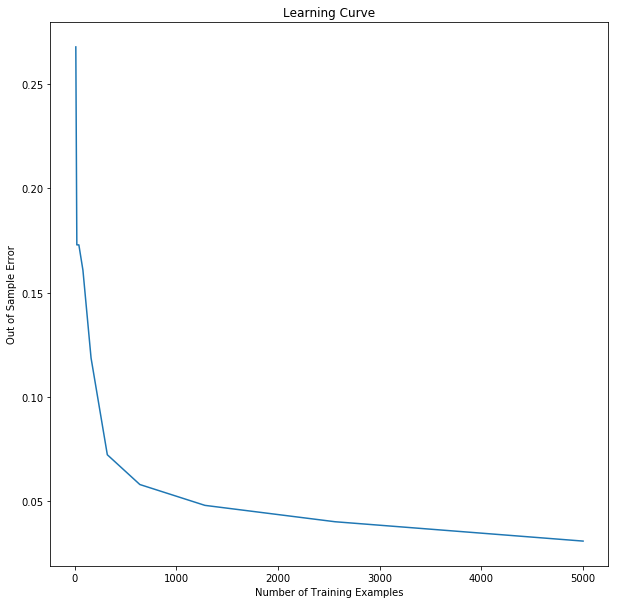

In [127]:
plt.figure(figsize = (10, 10))
plt.plot(nexamples, error)
plt.title('Learning Curve')
plt.ylabel('Out of Sample Error')
plt.xlabel('Number of Training Examples')

## Part 3:  Data normalization 

In this section we will explore the effect of normalizing the data, focusing on normalization of features.  The simplest form of normalization is to scale each feature to be in the range [-1, 1].  We'll call this **scaling**.

Here's what you need to do:

  - Explain how to scale the data to be in the range [-1, 1].
  - Compare the accuracy of the perceptron with bias on the original data and the scaled version of the heart dataset.  Does one of them lead to better performance?  Explain why you think this happens.  
  - An alternative way of normalizing the data is to **standardize** it:  for each feature subtract the mean and divide by its standard deviation.  What can you say about the range of the resulting features in this case?  




In [1]:
# your answer here

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  60 points.
(30 points):  Correct implementation of the classifiers
(15 points):  Good protocol for evaluating classifier accuracy; results are provided in a clear and concise way
(15 points):  Discussion of the results

Part 2:  20 points.
(15 points):  Learning curves are correctly generated and displayed in a clear and readable way
( 5 points):  Discussion of the results

Part 3:  20 points.
( 5 points):  How to perform data scaling
(10 points):  Comparison of normalized/raw data results; discussion of results
( 5 points):  Range of features after standardization
```


Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  